In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('aggregation.csv')

In [3]:
df.head()

,15.55,28.65,2
0,14.90,27.55,2
1,14.45,28.35,2
2,14.15,28.80,2
3,13.75,28.05,2
4,13.35,28.45,2


In [4]:
x = df.iloc[:,[0,1]].values

In [5]:
x

array([[14.9 , 27.55],
       [14.45, 28.35],
       [14.15, 28.8 ],
       ...,
       [ 8.5 ,  3.25],
       [ 8.1 ,  3.55],
       [ 8.15,  4.  ]])

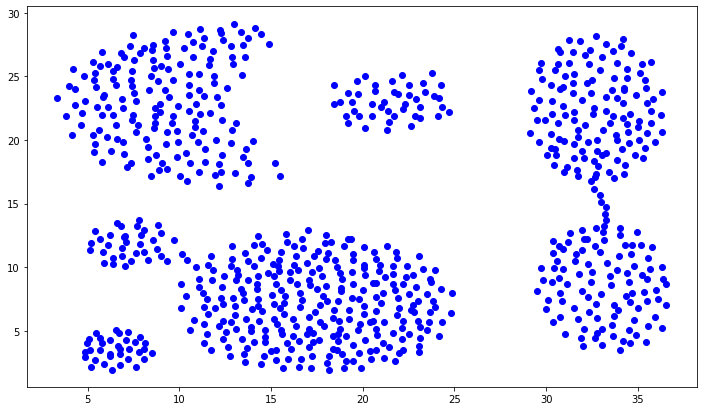

In [7]:
plt.figure(figsize=(12,7))
plt.scatter(x[:,0],x[:,1],c='b')
plt.show()

In [8]:
model = DBSCAN()

In [12]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

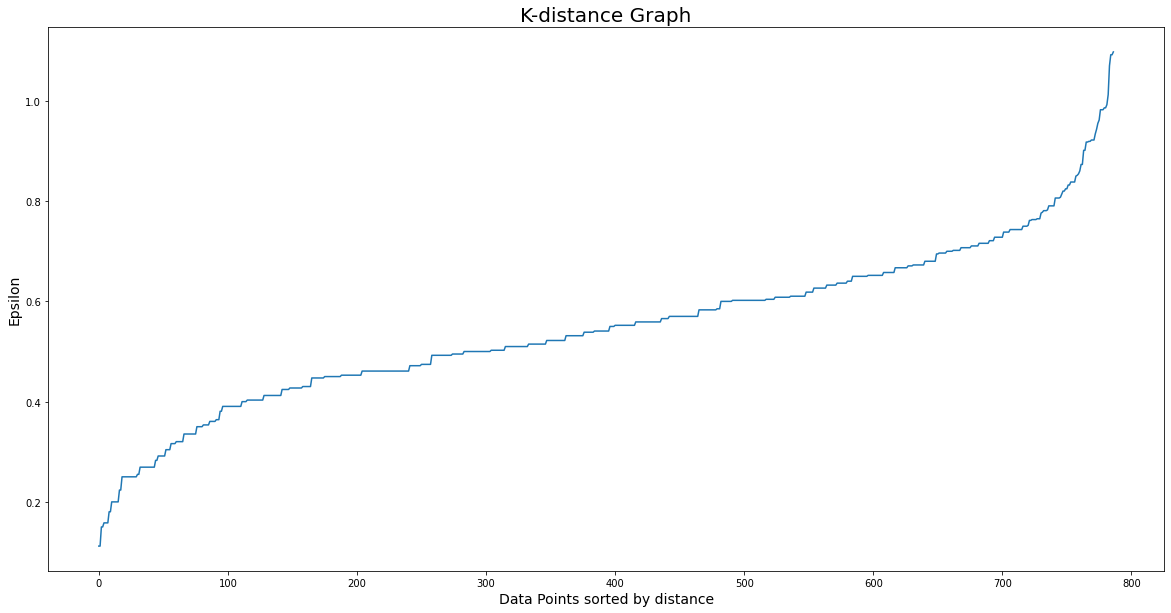

In [14]:
import numpy as np
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [42]:
dbscan = DBSCAN(eps=1.5 , min_samples= 7)
dbscan.fit(x)

DBSCAN(eps=1.5, min_samples=7)

In [43]:
y = dbscan.labels_

In [44]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

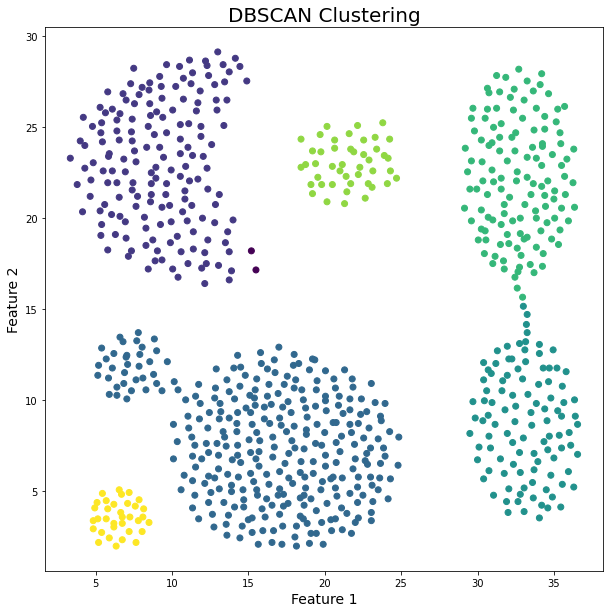

In [50]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=y)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [61]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [66]:
z = estimate_bandwidth(x, quantile=0.2, n_samples=250)

Text(0, 0.5, 'Y - axis ')

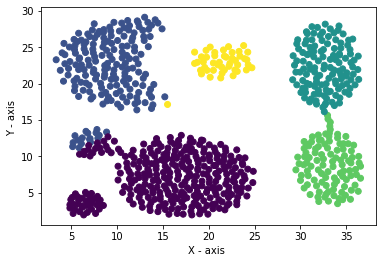

In [67]:
model = MeanShift(bandwidth = z)
model.fit(x)
y_pred  = model.predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap="viridis")
plt.xlabel("X - axis ")
plt.ylabel("Y - axis ")